In [29]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import pymysql

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.dpi'] = 100

In [30]:
설비투자 = pd.read_excel('설비투자.xlsx')

In [31]:
설비투자

,날짜,원자료
0,1970 Q1,502.3
1,1970 Q2,529.8
2,1970 Q3,542.3
3,1970 Q4,657.6
4,1971 Q1,620.8
...,...,...
209,2022 Q2,45096.5
210,2022 Q3,44348.0
211,2022 Q4,49004.4
212,2023 Q1,44491.8


In [32]:
설비투자.날짜 = 설비투자.날짜.str[:4]

In [33]:
설비투자1 = 설비투자.groupby('날짜').sum().iloc[-14:,:]

In [34]:
설비투자1

,원자료
날짜,
2010,125911.9
2011,132898.3
2012,134262.7
2013,128966.0
2014,135481.1
2015,142433.4
2016,146179.0
2017,170275.4
2018,166289.3


In [35]:
산업용 = pd.read_csv('정리1/all_city.csv')
업무용 = pd.read_csv('정리1/all_city.csv')

In [36]:
산업용 = pd.DataFrame(산업용.groupby('연도').sum().iloc[:,-1])
업무용 = pd.DataFrame(업무용.groupby('연도').sum().iloc[:,3])

In [37]:
산업용

,산업용
연도,
2015,265454647
2016,269956259
2017,276672284
2018,283704723
2019,279769434
2020,267129257
2021,282664878
2022,287936890


In [38]:
설비투자1 = 설비투자1.iloc[3:,:]

Text(0.5, 1.0, '산업용 전력 판매량')

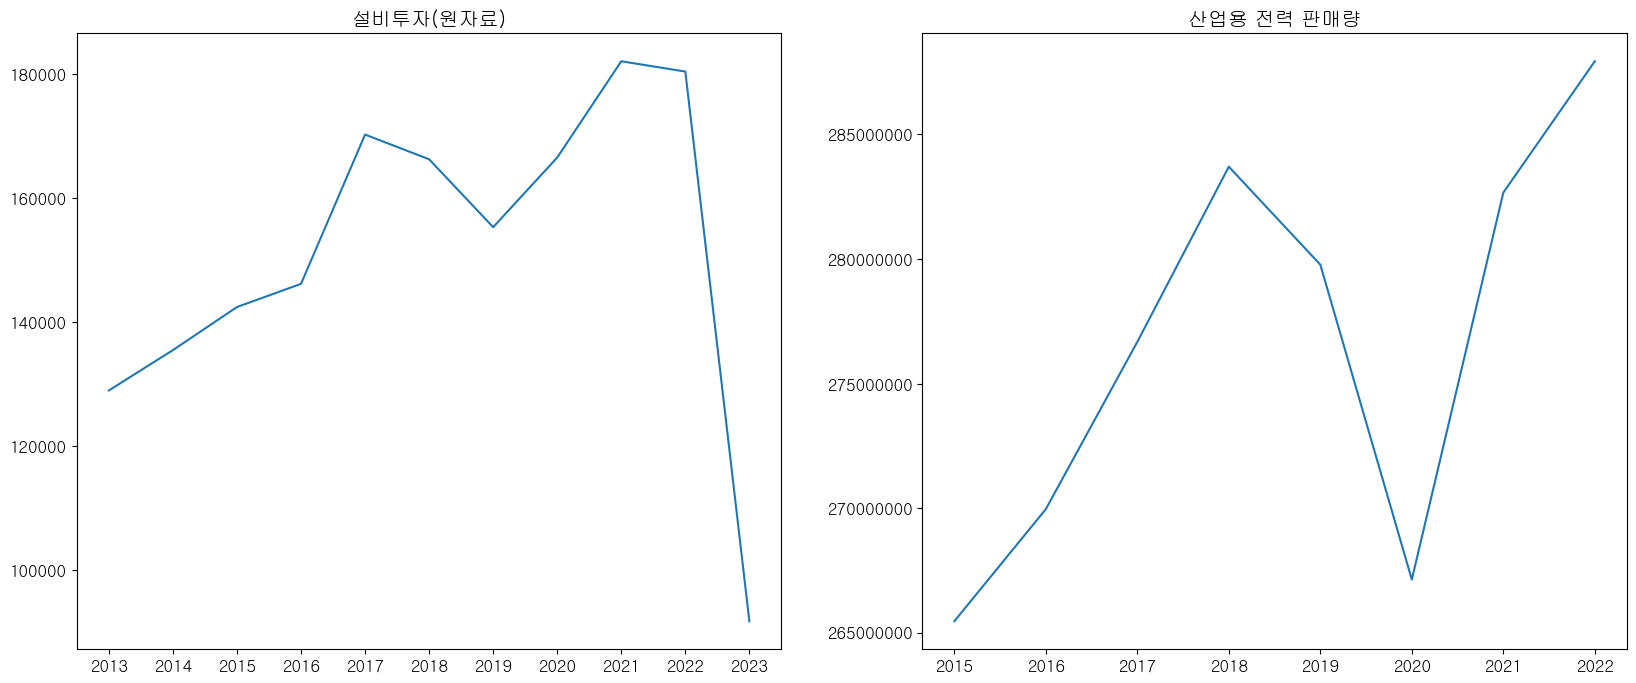

In [39]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax[0].plot(설비투자1.index,설비투자1)
ax[0].get_yaxis().get_major_formatter().set_scientific(False)
ax[0].set_title('설비투자(원자료)')
ax[1].plot(산업용.index,산업용)
ax[1].get_yaxis().get_major_formatter().set_scientific(False)
ax[1].set_title('산업용 전력 판매량')

In [40]:
EPU지수 = pd.read_excel('EPU지수.xlsx')

In [41]:
epu지수 = EPU지수.loc[:,(EPU지수.columns == 'Year') | (EPU지수.columns == 'South Korea')]

In [42]:
epu지수 = epu지수.groupby('Year').sum()

In [43]:
epu지수.drop([2013,2014,2023],inplace=True)

Text(0.5, 1.0, '업무용 전력 판매량')

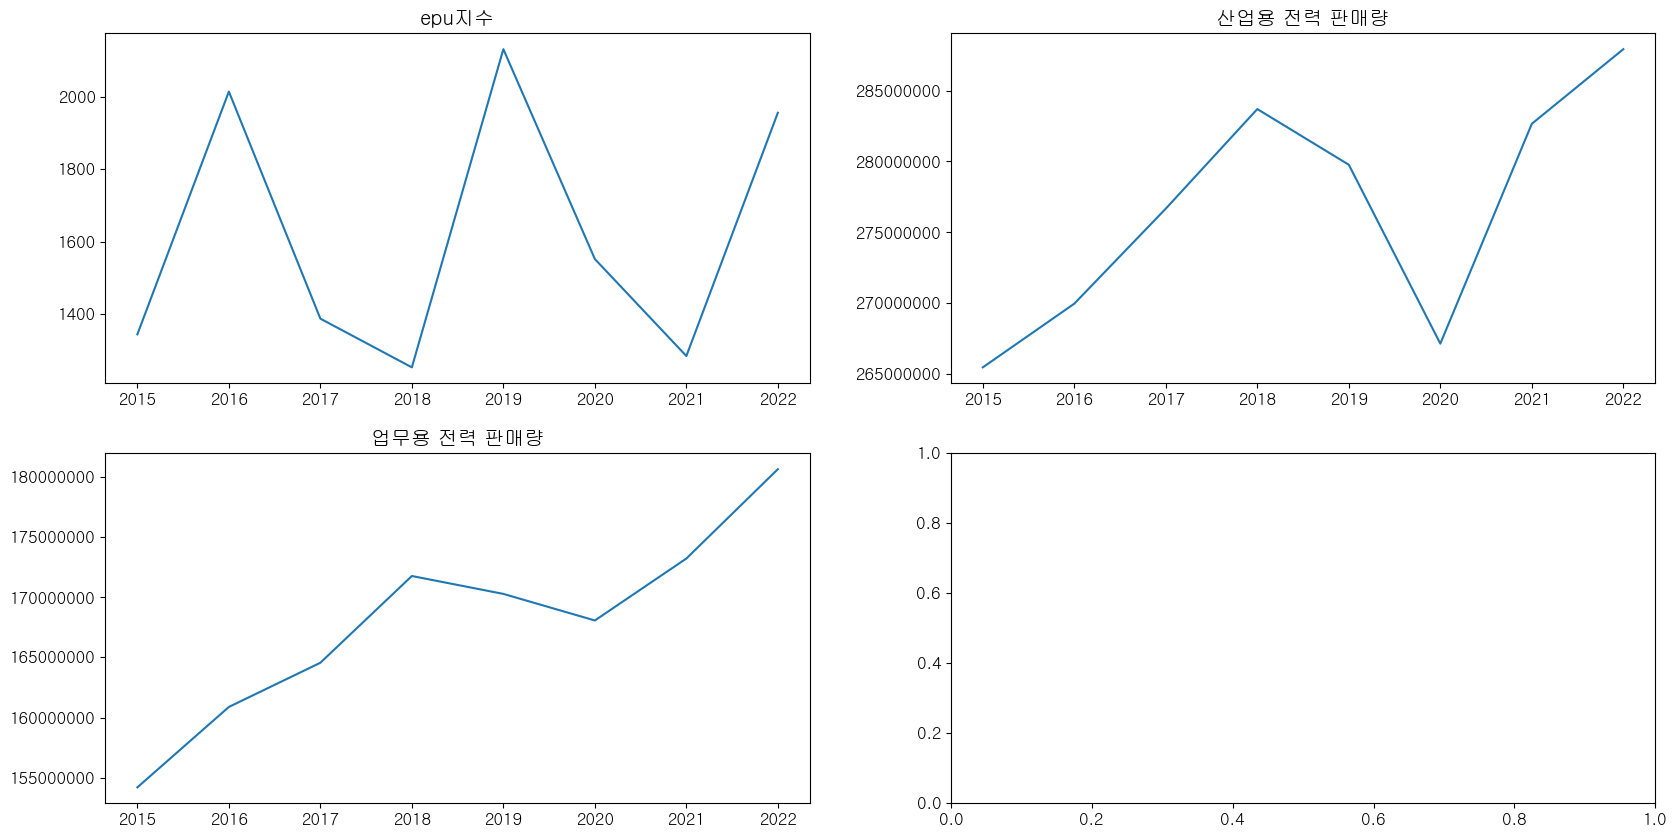

In [44]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
ax[0,0].plot(epu지수.index,epu지수)
ax[0,0].get_yaxis().get_major_formatter().set_scientific(False)
ax[0,0].set_title('epu지수')
ax[0,1].plot(산업용.index,산업용)
ax[0,1].get_yaxis().get_major_formatter().set_scientific(False)
ax[0,1].set_title('산업용 전력 판매량')
ax[1,0].plot(업무용.index,업무용)
ax[1,0].get_yaxis().get_major_formatter().set_scientific(False)
ax[1,0].set_title('업무용 전력 판매량')